### Steps of Project Execution
1.Load Libraries
1.Load Libraries
2.Load Data
3.Analyaze Data
4.Feature Engineering
5.Modeling 
6.Algorithm Tuning
7.Finalizing The Model


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
#importing dataset
dataset = pd.read_csv('adult.csv')
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
dataset.fillna(np.nan,inplace = True)

In [10]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [42]:
#Reformating the income column
dataset['income'] = dataset['income'].map({
    '<=50K':0,
    '>50K':1,
    '<=50K.':0,
    '>50K.':1
    
})

In [43]:
dataset['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

## Analyze Data

In [44]:
#Identify the numeric Features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

#Identify the Chategorical Features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

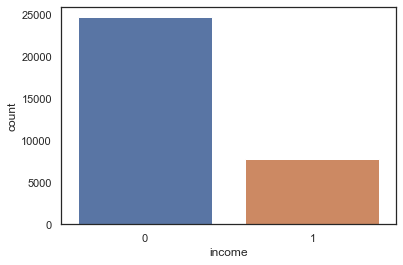

In [45]:
import seaborn as sns
sns.countplot(dataset['income'], label = 'Count')
sns.set(style='white', context='notebook', palette='deep')

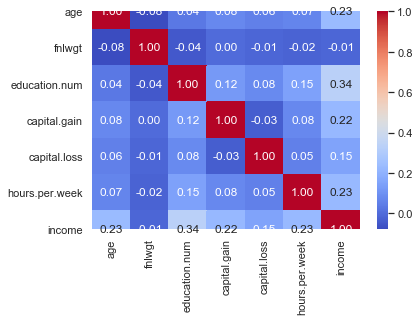

In [46]:
#Finding the Correlation between numeric values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

education.num = 0.34,
hours.per.week =0.23,
age = 0.23,
capital.gain =0.23

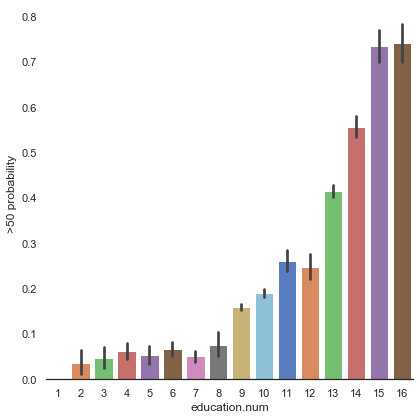

In [47]:
#Exploring the education.num Vs Income
g = sns.factorplot(x = 'education.num', y = 'income',data = dataset, kind ='bar', size =6, palette = 'muted')
g.despine(left =True)
g = g.set_ylabels('>50 probability')

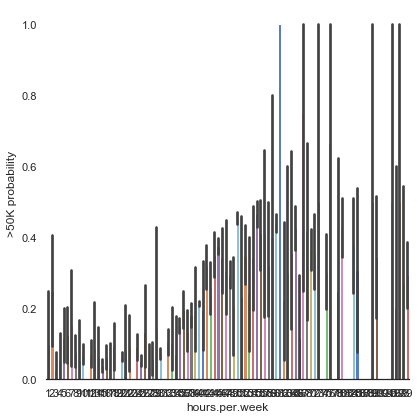

In [48]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

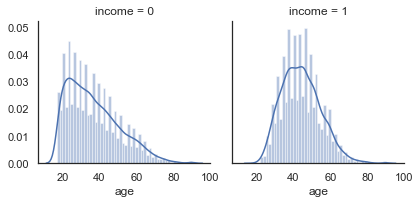

In [49]:
#Exploring age Vs Income
g = sns.FacetGrid(dataset, col ='income')
g = g.map(sns.distplot,'age')
plt.show()

In [50]:
#Filling all missing categorical values
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

In [51]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [52]:
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


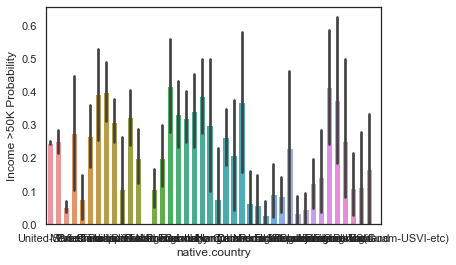

In [53]:
#Explore native nation vs Income
g = sns.barplot(x="native.country", y='income',data = dataset)
g =g.set_ylabel("Income >50K Probability")
plt.show()

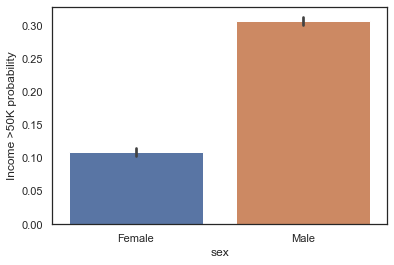

In [54]:
#Explore sex vs Income
g = sns.barplot(x='sex', y ='income', data = dataset)
g = g.set_ylabel('Income >50K probability')
plt.show()

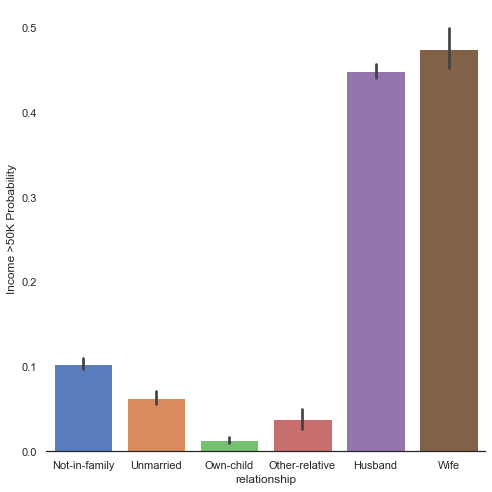

In [55]:
#Explore Relationship vs Income
g  =sns.factorplot(x = 'relationship', y='income', data =dataset, kind='bar',palette='muted',size=7)
g.despine(left =True)
g = g.set_ylabels('Income >50K Probability')
plt.show()

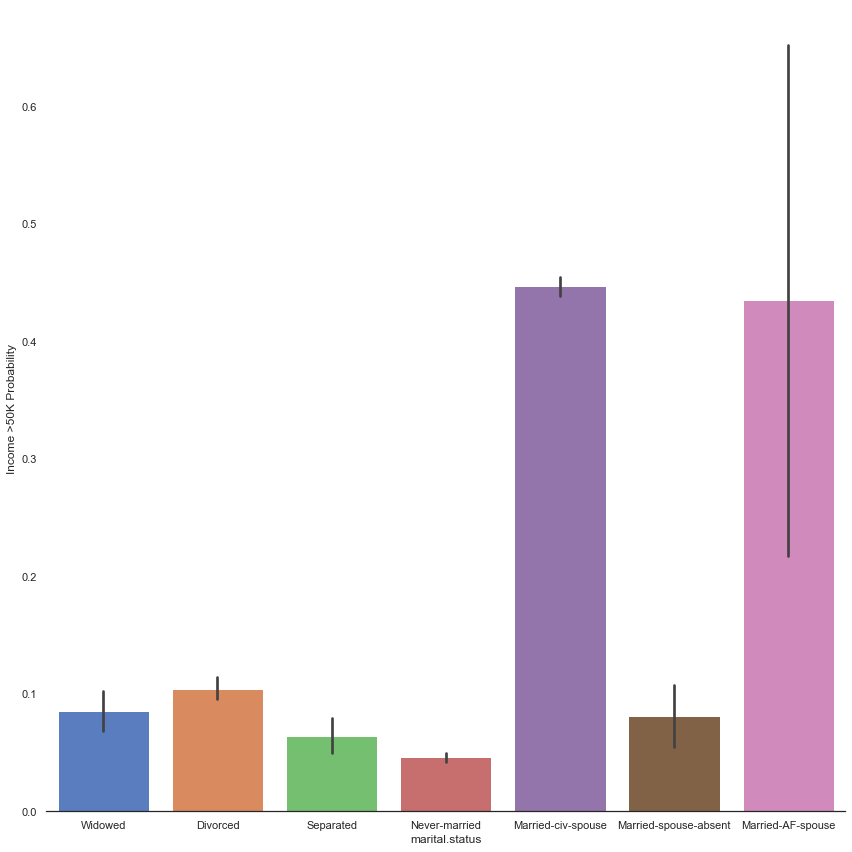

In [56]:
#Explore Marital Status Vs Income
g = sns.factorplot(x='marital.status', y='income',data =dataset, kind ='bar',palette='muted',size=12)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

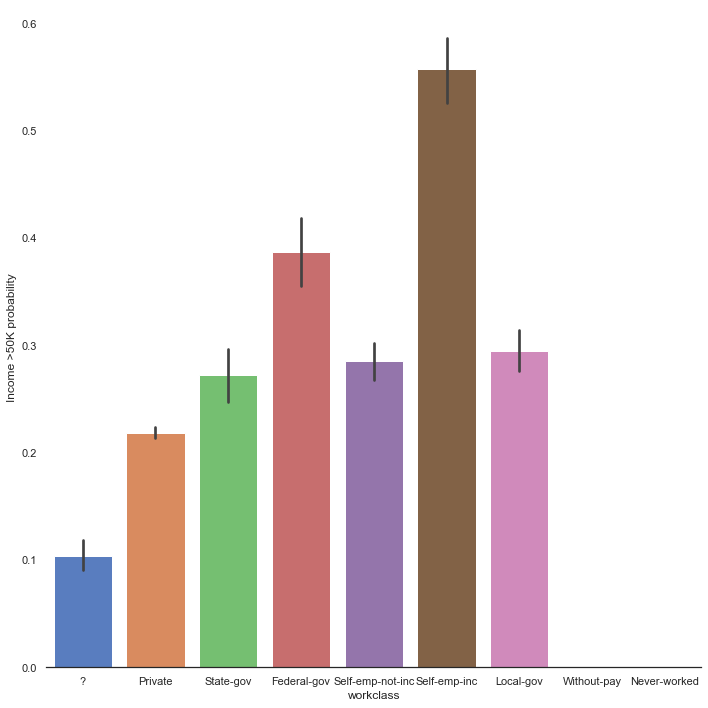

In [57]:
#Explore Workclass vs Income
g = sns.catplot(x ='workclass', y='income', data=dataset,kind ='bar',palette ='muted',height=10)
g.despine(left=True)
g = g.set_ylabels('Income >50K probability')
plt.show()

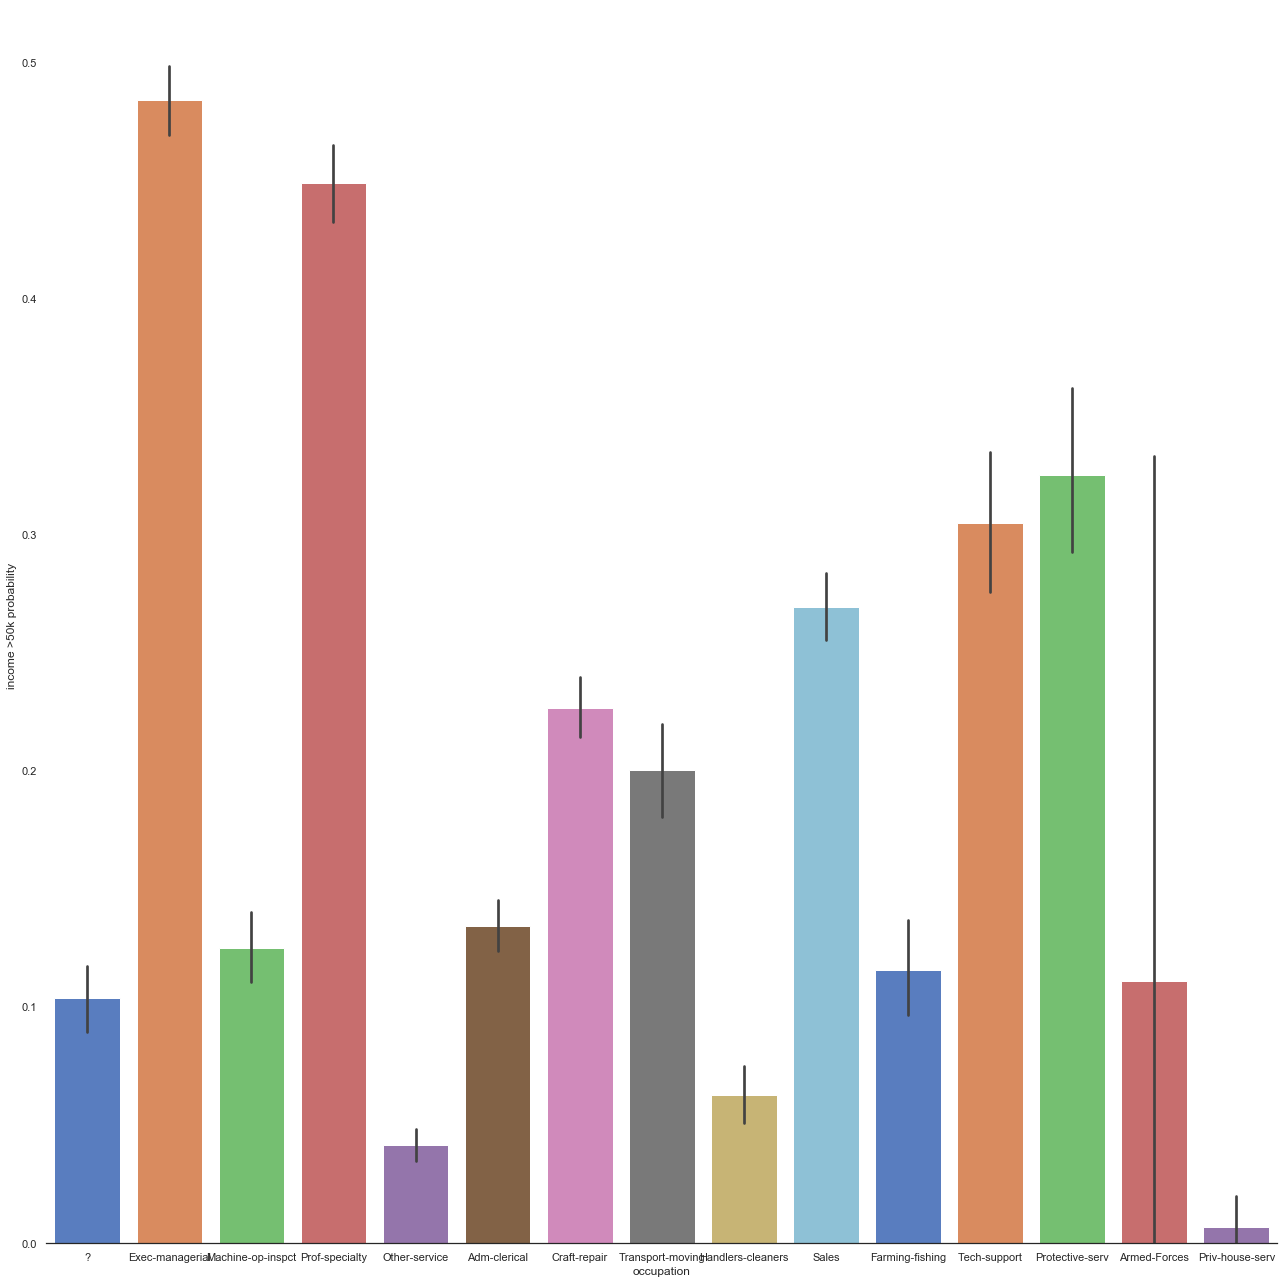

In [58]:
#Explore occupation vs Income
g =sns.catplot(x='occupation', y='income', data =dataset, kind='bar', palette='muted',height=18)
g.despine(left=True)
g = g.set_ylabels('income >50k probability')

## Featue Engineering

In [59]:
#Convert Sex value to 0 and 1
dataset['sex'] = dataset['sex'].map({
    'Male': 0,
    'Female': 1
})

In [60]:
dataset['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [61]:
#Convert Married Column - binary Yes(1) No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})


In [62]:
#Drop data you dont want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with dropped labels')
print(dataset.head())

Dataset with dropped labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9               0    1             0   
1   82  132870              9               0    1             0   
2   66  186061             10               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   

   capital.loss  hours.per.week  income  
0          4356              40       0  
1          4356              18       0  
2          4356              40       0  
3          3900              40       0  
4          3900              40       0  


In [63]:
dataset['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

## Modeling

In [64]:
#split -out  Validation dataset and create Test Variables
array = dataset.values
X = array[:, 0:8]
y = array[:, 8]
print('Split Data:X')
print(pd.DataFrame(X))
dataset

Split Data:X
        0       1   2  3  4  5     6   7
0      90   77053   9  0  1  0  4356  40
1      82  132870   9  0  1  0  4356  18
2      66  186061  10  0  1  0  4356  40
3      54  140359   4  0  1  0  3900  40
4      41  264663  10  0  1  0  3900  40
...    ..     ...  .. .. .. ..   ...  ..
32556  22  310152  10  0  0  0     0  40
32557  27  257302  12  1  1  0     0  38
32558  40  154374   9  1  0  0     0  40
32559  58  151910   9  0  1  0     0  40
32560  22  201490   9  0  0  0     0  20

[32561 rows x 8 columns]


,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,0
1,82,132870,9,0,1,0,4356,18,0
2,66,186061,10,0,1,0,4356,40,0
3,54,140359,4,0,1,0,3900,40,0
4,41,264663,10,0,1,0,3900,40,0
...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,0,0,40,0
32557,27,257302,12,1,1,0,0,38,0
32558,40,154374,9,1,0,0,0,40,1
32559,58,151910,9,0,1,0,0,40,0


In [65]:
print('Split Data:y')
print(y)

Split Data:y
[0 0 0 ... 1 0 0]


In [66]:
validation_size =0.20
seed =7
num_folds =10
scoring ='accuracy'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = validation_size,random_state=7)

In [69]:
# Parameters for random forest
num_trees = 100
max_features = 3

models = []
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

In [71]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\MS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

LR: 0.796414 (0.004155)
LDA: 0.829507 (0.004318)
KNN: 0.774455 (0.005765)
CART: 0.808278 (0.005800)
NB: 0.794303 (0.003642)
RF: 0.841101 (0.004556)


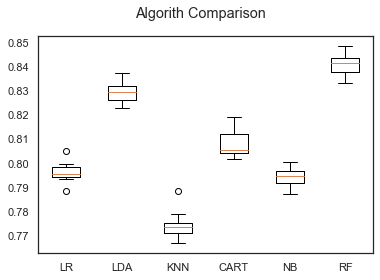

In [72]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [76]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 84.15476738830033%
[[4548  416]
 [ 616  933]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4964
           1       0.69      0.60      0.64      1549

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513

